# 💡 STRATEGY

Go To Kelly_game folder for additional information  

[Guide backtesting](https://greyhoundanalytics.com/blog/backtestingpy-a-complete-quickstart-guide/)

# Install

In [1]:
# import library
from backtesting import Backtest
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sys

sys.path.insert(0, 'C:/Users/Salim Hmidi/Documents/ALGO/Kelly_RM/')

import src.data as data

In [2]:
# import strategy
from src.strategy import RsiOscillator

# Variable

In [6]:

date_debut = '2018-01-01'
date_fin = '2021-01-01'

sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

#tickers = np.array(sp500[0]['Symbol'])

tickers ='AAL'

strat = [RsiOscillator]


df_traning =[]
df_unsee =[]

## Load the prices

In [4]:


#Get the list of symbols
data_downloaded = await data.get_historical_price_full_crypto(tickers)
historical=data_downloaded['historical']

## Preprocess the data used in the strategy

In [5]:
data = pd.DataFrame(historical)
data.columns = [x.title() for x in data.columns] #uppercase first letter
data.drop(['Adjclose','Unadjustedvolume', 'Change', 'Changepercent', 'Vwap', 'Label','Changeovertime'], axis=1,inplace=True)
data['Date']=pd.to_datetime(data['Date'])
data.set_index('Date',inplace=True) #date needs to be set as index!
data=data.iloc[::-1] #to reverse the order of the dataframe
data


,Open,High,Low,Close,Volume
Date,,,,,
2018-07-06,38.19,38.3900,37.7600,38.090,3695004
2018-07-09,38.21,39.4100,38.0700,39.310,4530423
2018-07-10,39.38,39.4000,38.5000,39.120,4909957
2018-07-11,38.31,38.3400,35.9000,35.960,24894183
2018-07-12,36.40,36.7700,35.6400,36.330,12226590
...,...,...,...,...,...
2023-06-28,17.35,17.5775,17.2800,17.550,26466279
2023-06-29,17.64,17.9800,17.5300,17.600,20315698
2023-06-30,17.72,17.9900,17.6715,17.940,18610161


# Divide Your Data into Two Sets

- **Training Data**: This set is used for training the model and learning the underlying patterns in the data.

- **Unseen Data**: This set, also known as the test or validation data, is held out from the training process.


# Training and Optimizing Backtest Parameters

1. Define the parameter space by listing the variables to optimize, such as indicators or thresholds, along with their potential values.

2. Conduct backtests using different parameter combinations and evaluate performance using metrics like total return, Sharpe ratio, maximum drawdown, and win rate.

3. Perform parameter optimization by identifying the parameter values that yield the best results using techniques like grid search or genetic algorithms.


c:\Users\Salim Hmidi\ANAconda\lib\site-packages\backtesting\backtesting.py:1488: UserWarning: Searching for best of 22500 configurations.
  output = _optimize_grid()


  0%|          | 0/75 [00:00<?, ?it/s]

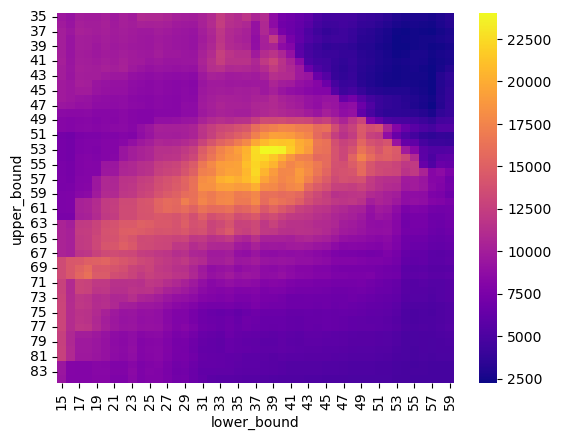

In [13]:
bt = Backtest(data, strat[0], cash=10_000, commission=.002)
#bt = Backtest(df_trainnig, strat[0], cash=10_000, commission=.002)
stats, heatmap = bt.optimize(
        upper_bound = range(35,85,1),
        lower_bound = range(15,60,1),
        rsi_window = range(10,30,2),
        maximize='Equity Final [$]',
        return_heatmap=True)

# choose your colormaps from here
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
hm = heatmap.groupby(["upper_bound","lower_bound"]).mean().unstack()
sns.heatmap(hm, cmap="plasma")
plt.show()

# Filtering Tickers with Inconsistent Results


1. Set a consistency threshold for each metric.

2. Filter out tickers that fail to meet the consistency threshold.

3. Review and refine the remaining tickers based on additional criteria or preferences.


In [17]:

bt.plot()
print(stats['_trades'].to_string())

    Size  EntryBar  ExitBar  EntryPrice  ExitPrice         PnL  ReturnPct  EntryTime   ExitTime Duration
0    299        67       92    33.39666      38.00  1376.39866   0.137838 2018-10-10 2018-11-14  35 days
1    376       119      141    30.18024      36.76  2473.98976   0.218015 2018-12-26 2019-01-29  34 days
2    442       171      189    31.28244      33.64  1042.04152   0.075364 2019-03-13 2019-04-08  26 days
3    499       221      236    29.78946      32.97  1587.08946   0.106767 2019-05-23 2019-06-14  22 days
4    570       272      298    28.90770      29.67   434.51100   0.026370 2019-08-06 2019-09-12  37 days
5    662       313      326    25.52094      28.50  1972.13772   0.116730 2019-10-03 2019-10-22  19 days
6      1       435      482    13.22640      21.25     8.02360   0.606635 2020-03-30 2020-06-05  67 days
7    799       412      482    23.61714      21.25 -1891.34486  -0.100230 2020-02-26 2020-06-05 100 days
8    890       764      812    19.08810      21.77  238

# Comparing with Unseen Data


1. Compare strategy performance on the test set with backtest results.

2. Analyze deviations and identify contributing factors.(COVID 19)

3. Filter inconsistent Results



# Estimating Odds of Win, Loss, and Gain













# Kelly Criterion

The Kelly Criterion is a risk management strategy used to determine the optimal capital allocation. Here's a simplified guide:

1. Calculate the Kelly Criterion formula:
   f* = (p * b - q) / b

2. Estimate the probabilities of winning (p) and the net odds received upon winning (b).

3. Calculate the optimal allocation using the formula.

4. Assess risk and adjust the allocation if necessary.

5. Monitor and update allocations based on performance and changing conditions.

Note: Consider other factors and seek professional advice for a comprehensive understanding.

